<h1 style="text-align:center">Household Power Consumption</h1>

In [3]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Ingestion

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#df = pd.read_csv("data\household_power_consumption.txt",sep=";")
df = pd.read_csv("/content/drive/MyDrive/Dataset/household_power_consumption.txt",sep=";")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# EDA (Exploratory Data Ananlysis)

In [5]:
df.shape

(2075259, 9)

Around 20 Lakh instances in datasets and 9 features

### Data Samples

In [6]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


### Information about data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


### Feature information

* date: Date in format dd/mm/yyyy
* time: time in format hh:mm:ss
* global_active_power: household global minute-averaged active power (in kilowatt)
* global_reactive_power: household global minute-averaged reactive power (in kilowatt)
* voltage: minute-averaged voltage (in volt)
* global_intensity: household global minute-averaged current intensity (in ampere)
* sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
* sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
* sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

### Checking null values

In [8]:
df.isnull().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

We have null values in Sub_metering_3 feature

### Checking Data Types of Features

In [9]:
df.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

All the columns are of object type so need to coneverted into numerical as per values

In [10]:
### Taking Samples from data
df = df.sample(50000)
df.shape

(50000, 9)

### Handling Missing Values

In [11]:
df.isnull().sum()

Date                       0
Time                       0
Global_active_power        0
Global_reactive_power      0
Voltage                    0
Global_intensity           0
Sub_metering_1             0
Sub_metering_2             0
Sub_metering_3           643
dtype: int64

In [12]:
df["Sub_metering_3"].fillna(0,inplace=True)

In [13]:
cols = df.columns
cols

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [14]:
#Converting data types of columns
for col in cols[2:]:
    df[col] = df[col].replace("?","0")
    df[col] = df[col].astype("float64")

### Creating new feature

In [15]:
##Creating month feature as it can effect the consumtion rate of electricity
df["month"] = pd.to_datetime(df["Date"],infer_datetime_format=True).dt.month

In [16]:
### Creating total metering feature
df["total_metering"] = df["Sub_metering_1"] + df["Sub_metering_2"] + df["Sub_metering_3"]

### Numerical and Categorical Features

In [17]:
cat_feature = []
num_feature = []
for col in df.columns:
    if df[col].dtype == "int64" or df[col].dtype == "float64":
        num_feature.append(col)
    elif df[col].dtype == "O":
        cat_feature.append(col)

In [18]:
print(f"Categorical features in dataset {cat_feature}")
print(f"Numerical features in dataset {num_feature}")

Categorical features in dataset ['Date', 'Time']
Numerical features in dataset ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'month', 'total_metering']


## Univariate Analysis

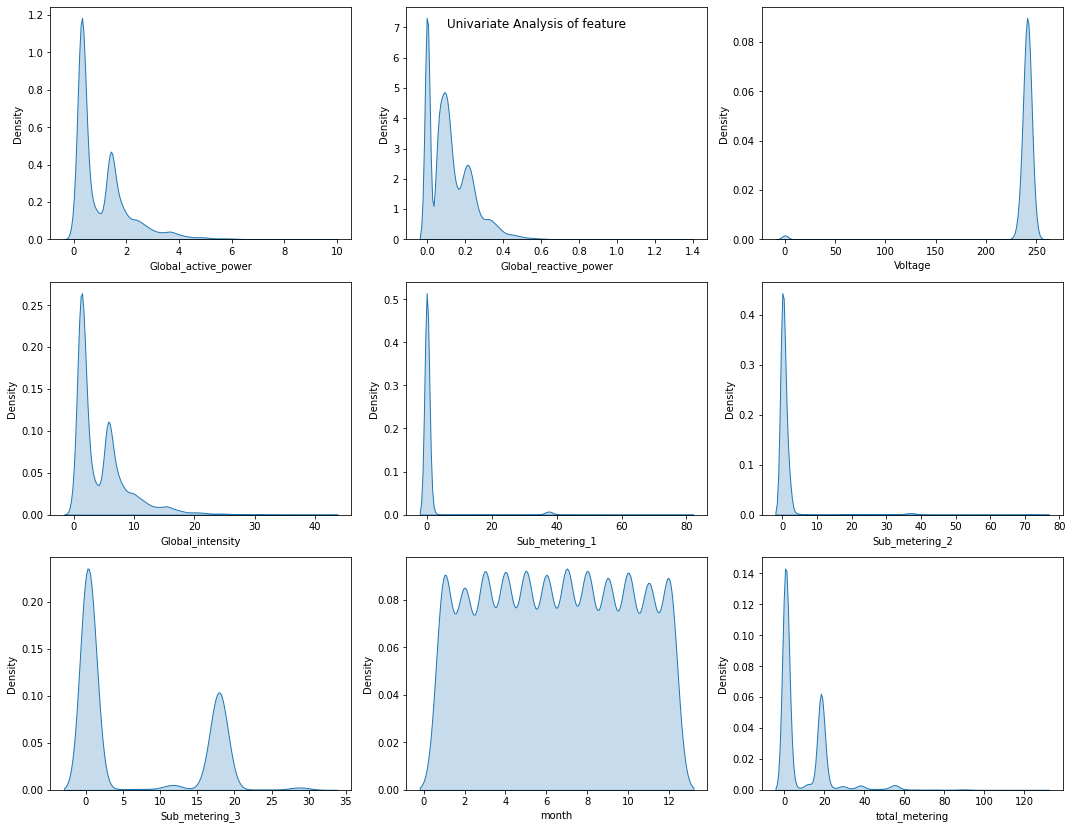

In [19]:
## Plotting KDE plot to see the distributions of the numerial features
plt.figure(figsize=(15,15))
plt.suptitle("Univariate Analysis of feature")

for i in range(len(num_feature)):
    plt.subplot(4,3,i+1)
    sns.kdeplot(x=df[num_feature[i]],shade=True)
    plt.xlabel(num_feature[i])
    plt.ylabel("Density")
    plt.tight_layout()

All the features are skewed means all of them contains outliers except month

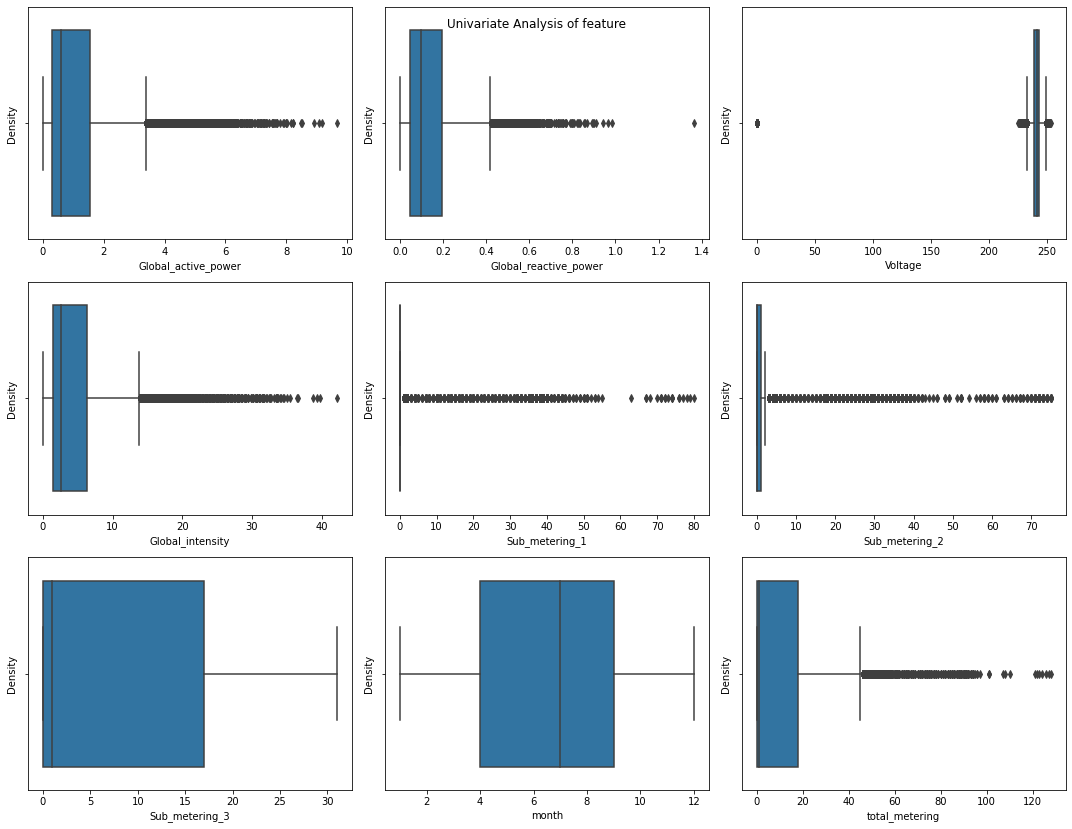

In [20]:
## plotting box plot to check outliers
plt.figure(figsize=(15,15))
plt.suptitle("Univariate Analysis of feature")

for i in range(len(num_feature)):
    plt.subplot(4,3,i+1)
    sns.boxplot(x=df[num_feature[i]])
    plt.xlabel(num_feature[i])
    plt.ylabel("Density")
    plt.tight_layout()

Excet Sub_metering3 and month all of the data contains outliers

### We will keep the outliers as may be they required

## Bivariate Analysis of Dataset

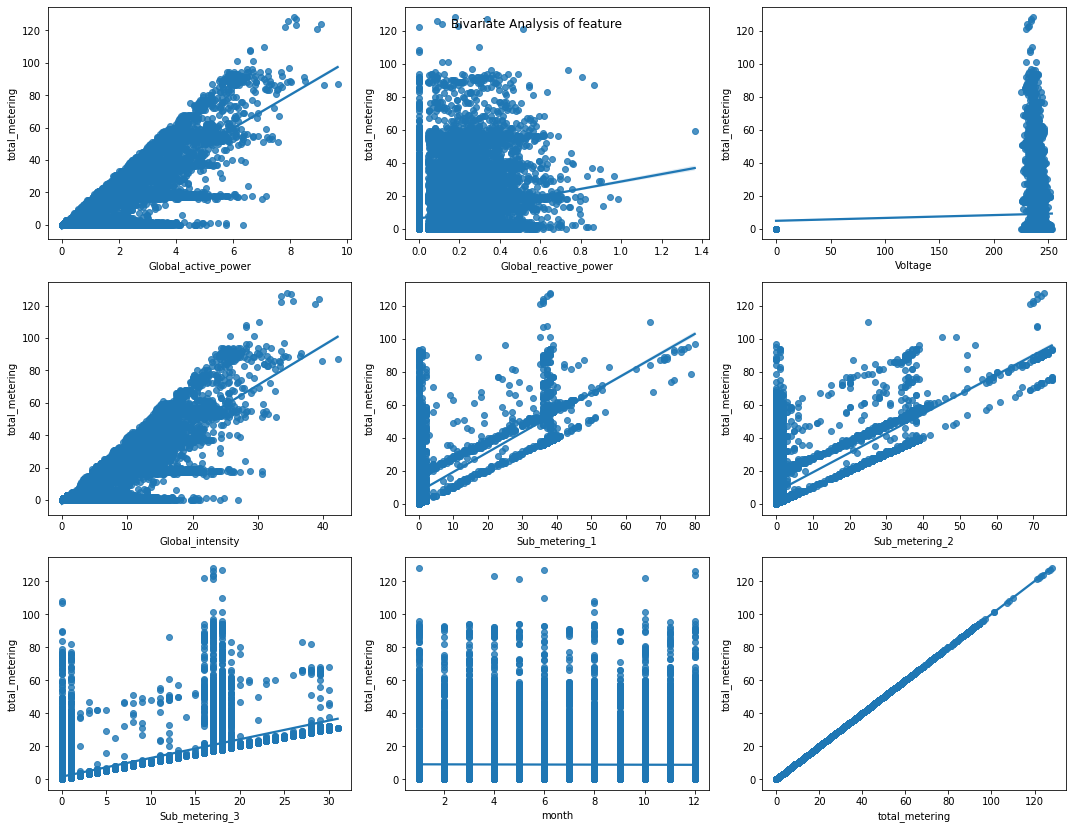

In [21]:
plt.figure(figsize=(15,15))
plt.suptitle("Bivariate Analysis of feature")

for i in range(len(num_feature)):
    plt.subplot(4,3,i+1)
    sns.regplot(data=df,x=num_feature[i],y='total_metering')
    plt.xlabel(num_feature[i])
    plt.ylabel('total_metering')
    plt.tight_layout()

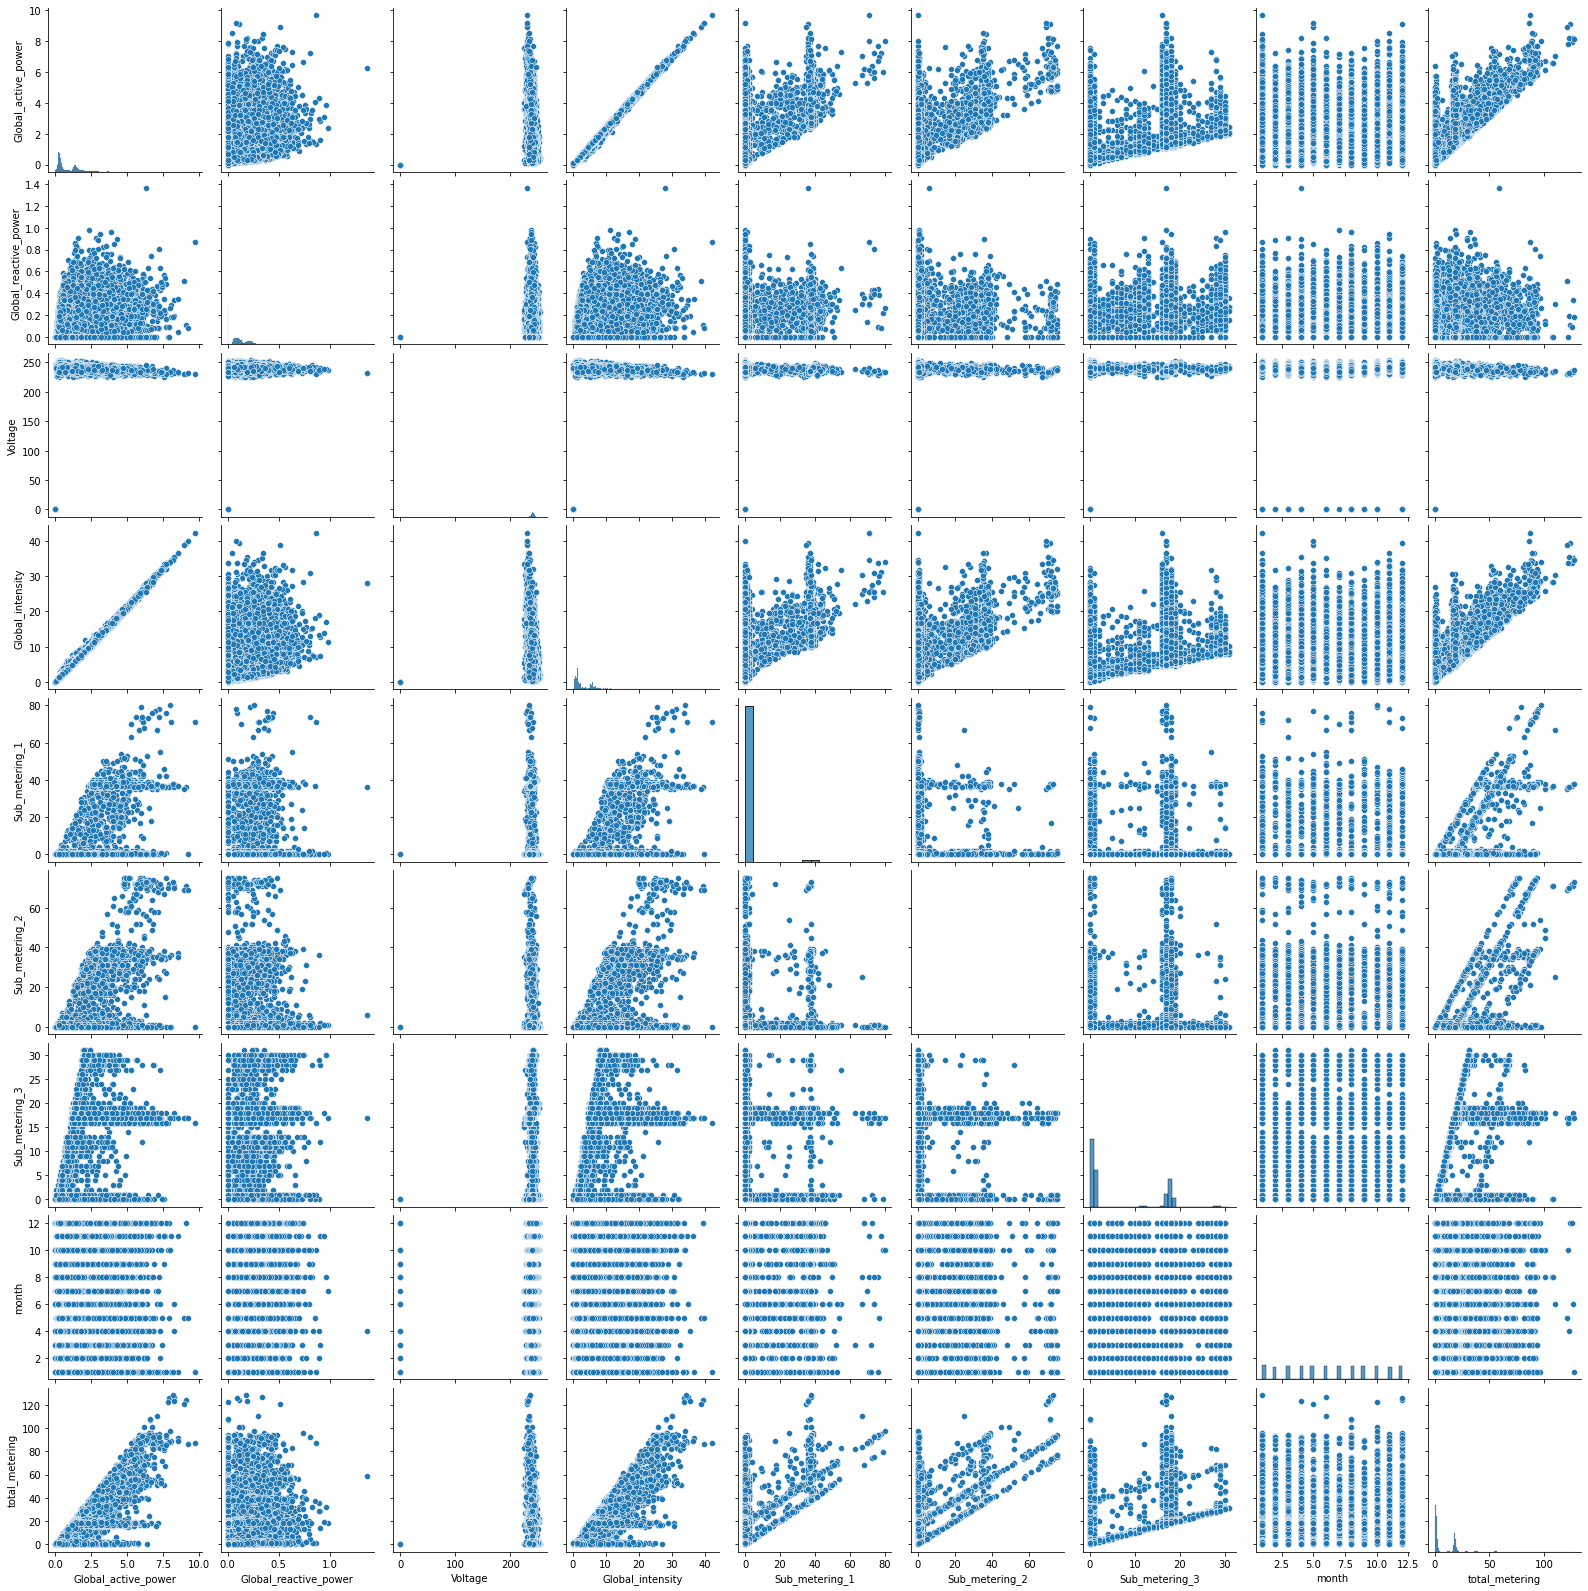

In [22]:
sns.pairplot(data=df)

## Multivariate Analysis of Dataset

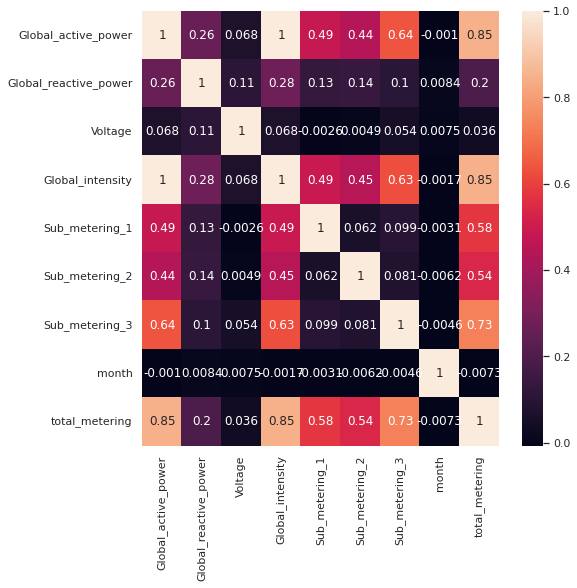

In [23]:
sns.set(rc={"figure.figsize":(8,8)})
sns.heatmap(df.corr(),annot=True)

### Dropping features which are not required

In [24]:
df.drop(["Date","Time","Sub_metering_1","Sub_metering_2","Sub_metering_3"],axis=1,inplace=True)

## Separating independent and dependent features

In [25]:
## Independent features
X = df.drop(["total_metering"],axis=1)
X

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,month
387980,0.202,0.102,242.73,1.0,12
217684,2.208,0.240,231.60,10.0,5
1550444,1.286,0.000,239.89,5.2,11
1119337,5.714,0.236,242.62,23.6,1
1944877,0.980,0.334,241.27,4.2,8
...,...,...,...,...,...
1237432,0.312,0.000,240.98,1.4,4
427796,0.678,0.000,233.86,2.8,9
188044,1.778,0.000,233.28,7.6,4
1107357,0.508,0.060,241.88,2.2,1


In [26]:
## Dependent feature
y = df["total_metering"]
y

387980      0.0
217684      1.0
1550444    18.0
1119337    58.0
1944877    12.0
           ... 
1237432     0.0
427796      0.0
188044     18.0
1107357     0.0
311532      1.0
Name: total_metering, Length: 50000, dtype: float64

## Splitting test and train Data

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=48,test_size=0.33)

## Standardizing the data - Not required in case of Decision Trees and Random Forest

In [28]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#x_train = scaler.fit_transform(x_train)
#x_train

## Model Training

In [29]:
## creating regression model and training it
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
bag_reg_model = ExtraTreesRegressor(n_estimators=100, random_state=0).fit(x_train,y_train)

In [ ]:
##standardization of test data - Not required
#x_test = scaler.transform(x_test)
#x_test

In [30]:
## testing of model
y_pred = bag_reg_model.predict(x_test)
y_pred

array([ 1.01, 20.18, 24.42, ..., 18.41, 18.71,  0.03])

In [31]:
## checking accuracy by MSE,MAE,RMSE,R2 and ajusted R2 
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("Mean absolute error: ",mean_absolute_error(y_test,y_pred))
print("Mean square error: ",mean_squared_error(y_test,y_pred))
print("r2 score: ",r2_score(y_test,y_pred))

Mean absolute error:  3.0453248484848485
Mean square error:  37.173582821212115
r2 score:  0.7747172168493285


In [32]:
#Adjusted R2 score
r2 = r2_score(y_test,y_pred)
N = x_train.shape[0] + x_test.shape[0]
P = x_train.shape[1]
adjusted_r2 = (1 - ((1-r2)*(N-1)))/(N-P-1)
print("Adjusted r2: ", adjusted_r2)

Adjusted r2:  -0.2252853117324164


In [33]:
bag_reg_model.score(x_train,y_train)

0.9999985769219084

Model is overfitted as training accuracy is much higher than testing accuracy